<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Задание-функций-для-создания-профилей,-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Задание-функций-для-создания-профилей,-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание функций для создания профилей, расчёта и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Исследование-маркетинга" data-toc-modified-id="Исследование-маркетинга-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование маркетинга</a></span></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span><ul class="toc-item"><li><span><a href="#LTV,-CAC,-ROI" data-toc-modified-id="LTV,-CAC,-ROI-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>LTV, CAC, ROI</a></span></li><li><span><a href="#Конверсия" data-toc-modified-id="Конверсия-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Конверсия</a></span></li><li><span><a href="#Удержание" data-toc-modified-id="Удержание-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Удержание</a></span></li><li><span><a href="#Окупаемость-с-разбивкой-по-устройствам" data-toc-modified-id="Окупаемость-с-разбивкой-по-устройствам-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Окупаемость с разбивкой по устройствам</a></span></li><li><span><a href="#Окупаемость-с-разбивкой-по-странам" data-toc-modified-id="Окупаемость-с-разбивкой-по-странам-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Окупаемость с разбивкой по странам</a></span></li><li><span><a href="#Окупаемость-с-разбивкой-по-источникам-привлечения" data-toc-modified-id="Окупаемость-с-разбивкой-по-источникам-привлечения-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Окупаемость с разбивкой по источникам привлечения</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Заключительные-выводы-и-рекомендации" data-toc-modified-id="Заключительные-выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Заключительные выводы и рекомендации</a></span></li></ul></div>

# Описание проекта

Компания, продающая развлекательное приложение Procrastinate Pro+, несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

    лог сервера с данными об их посещениях,
    выгрузка их покупок за этот период,
    рекламные расходы.

Описание данных
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.    
Структура visits_info_short.csv:

    User Id — уникальный идентификатор пользователя,
    Region — страна пользователя,
    Device — тип устройства пользователя,
    Channel — идентификатор источника перехода,
    Session Start — дата и время начала сессии,
    Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

    User Id — уникальный идентификатор пользователя,
    Event Dt — дата и время покупки,
    Revenue — сумма заказа.

Структура costs_info_short.csv:

    dt — дата проведения рекламной кампании,
    Channel — идентификатор рекламного источника,
    costs — расходы на эту кампанию.

## Предобработка

In [1]:
import pandas as pd                                #импорт библиотек
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
#загрузка данных в датафрейм
try:
    user = pd.read_csv('C:/Users/nshis/Downloads/visits_info_short.csv', encoding='utf-8')     
    order = pd.read_csv('C:/Users/nshis/Downloads/orders_info_short.csv', encoding='utf-8')
    costs = pd.read_csv('C:/Users/nshis/Downloads/costs_info_short.csv', encoding='utf-8')
    
except:
    user = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv', encoding='utf-8')     
    order = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv', encoding='utf-8')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv', encoding='utf-8')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)   #настройка параметров для отображения полной длины записи в строках, столбцах
pd.options.display.float_format = '{:.2f}'.format #настройка параметров отображения float с 2 точками после запятой

In [4]:
user.head()                               #просмотр строк датасета о посещениях сайта

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [5]:
user.info()                          #просмотр информации о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пустых строк нет. В столбцах с временем следует изменить тип данных.

In [6]:
user = user.rename(                                    #приводим названия столбцов к общепринятому формату
columns={
'User Id': 'user_id',
'Region': 'region',
'Device': 'device',
'Channel': 'channel',
'Session Start': 'session_start',
'Session End': 'session_end'
}
)

In [7]:
costs.head()                  #просмотр строк датасета о затратах на рекламу

dt   Channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
2  2019-05-03  FaceBoom  85.80
3  2019-05-04  FaceBoom 136.40
4  2019-05-05  FaceBoom 122.10

In [8]:
costs.info()                      #просмотр информации о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
costs = costs.rename(               #приводим названия столбцов к общепринятому формату
columns={
'Channel': 'channel'
}
)

In [10]:
order.info()                         #просмотр информации о датасете  с данными о заказах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [11]:
order.head()                           #прсмотр данных о заказах

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [12]:
order = order.rename(                    #приводим названия столбцов к общепринятому формату
columns={
'User Id': 'user_id',
'Event Dt': 'event_dt',
'Revenue': 'revenue',
}
)

In [13]:
costs['channel'].unique()           #просмотр уникальных значений

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [14]:
costs['channel'] = costs['channel'].str.lower()         #приведение данных к единому формату

In [15]:
user['region'].unique()                     #просмотр уникальных значений

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [16]:
user['device'].unique()                    #просмотр уникальных значений

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [17]:
user['channel'].unique()                    #просмотр уникальных значений

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [18]:
user['channel'] = user['channel'].str.lower()                   #приведение данных к единому формату

In [19]:
def dupl(df):                                      #  функция для удаления дубликатов
    df.drop_duplicates().reset_index(drop=True)
    df.info()
    return df

In [20]:
user = dupl(user)                                   #  удаление возможных дубликатов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [21]:
costs=dupl(costs)                                     #  удаление возможных дубликатов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [22]:
order=dupl(order)                                     #  удаление возможных дубликатов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [23]:
user['session_start'] = pd.to_datetime(user['session_start'])         #изменение формата для работы с временем
user['session_end'] = pd.to_datetime(user['session_end'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
order['event_dt'] = pd.to_datetime(order['event_dt'])

##  Задание функций для создания профилей, расчёта и анализа LTV, ROI, удержания и конверсии

In [24]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date 
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [27]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [28]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [29]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [30]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [31]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

In [32]:
profil = get_profiles(user, order, costs)        #создаем таблицу с данными профилей пользователей
profil.head()                                    #просмотр первых строк

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    faceboom     Mac  United States   
1   4919697 2019-07-09 12:46:07    faceboom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  adnonsense      PC        Germany   
4  31989216 2019-10-02 00:07:44     yrabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True              1.09  
1  2019-07-09 2019-07-01  False              1.11  
2  2019-10-01 2019-10-01  False              0.00  
3  2019-08-22 2019-08-01  False              0.99  
4  2019-10-02 2019-10-01  False              0.23

In [33]:
min_analysis_date = profil['dt'].min()            #максимальная и минимальная даты привлечения пользоваталей
max_analysis_date =  profil['dt'].max()
print(f" Минимальная дата привлечения пользователей: {min_analysis_date} ")
print(f" Максимальная дата привлечения пользователей: {max_analysis_date} ")

 Минимальная дата привлечения пользователей: 2019-05-01 
 Максимальная дата привлечения пользователей: 2019-10-27 


In [34]:
# Общее количество и количество платящих пользователей по регионам
region_profil = pd.pivot_table( profil, index= 'region', values=['user_id', 'payer'], aggfunc={'user_id': 'count', 'payer':'sum'}).sort_values(by='payer',ascending=False).sort_index(axis=1, ascending=False)
print('Количество пользователей по регионам с выделением платящих')
region_profil

Количество пользователей по регионам с выделением платящих


user_id  payer
region                       
United States   100002   6902
UK               17575    700
France           17450    663
Germany          14981    616

In [35]:
# Распределение пользователей по регионам с выделением доли платящих
region_profil = profil.groupby('region').agg({'payer':'mean'}).sort_values(by = 'payer', ascending = False)
print('Распределение пользователей по регионам с выделением доли платящих')
region_profil

Распределение пользователей по регионам с выделением доли платящих


payer
region              
United States   0.07
Germany         0.04
UK              0.04
France          0.04

Доля платящих пользователей в целом мала. Большая доля их находится в США. По остальным странам(Германия, Великобритания, Франция) платящие пользователи распределены равномерно.

In [36]:
# ОБщее количество и количество платящих пользователей по устройствам
device_profil = pd.pivot_table( profil, index= 'device', values=['user_id', 'payer'], aggfunc={'user_id': 'count', 'payer':'sum'}).sort_values(by='payer',ascending=False).sort_index(axis=1, ascending=False)
print('Распределение количества пользователей по устройствам с выделением платящих')
device_profil

Распределение количества пользователей по устройствам с выделением платящих


user_id  payer
device                 
iPhone     54479   3382
Android    35032   2050
Mac        30042   1912
PC         30455   1537

In [37]:
# Распределение пользователей по используемым устройствам с выделением доли платящих
device_profil = profil.groupby('device').agg({'payer':'mean'}).sort_values(by = 'payer', ascending = False)
print('Распределение пользователей по устройствам с выделением доли платящих')
device_profil

Распределение пользователей по устройствам с выделением доли платящих


payer
device        
Mac       0.06
iPhone    0.06
Android   0.06
PC        0.05

Платящие пользователи одинаково распределены по устройствам, за исключением пользователей, использующих PC. Их несколько меньше.

In [38]:
# ОБщее количество и количество платящих пользователей по источникам привлечения
channel_profil = pd.pivot_table( profil, index= 'channel', values=['user_id', 'payer'], aggfunc={'user_id': 'count', 'payer':'sum'}).sort_values(by='payer',ascending=False).sort_index(axis=1, ascending=False)
print('Распределение пользователей по источникам привлечения с выделением платящих')
channel_profil

Распределение пользователей по источникам привлечения с выделением платящих


user_id  payer
channel                           
faceboom              29144   3557
tiptop                19561   1878
organic               56439   1160
wahoonetbanner         8553    453
adnonsense             3880    440
rocketsuperads         4448    352
leapbob                8553    262
opplecreativemedia     8605    233
lambdamediaads         2149    225
yrabbit                4312    165
mediatornado           4364    156

In [39]:
# Распределение пользователей по источникам привлечения с выделением доли платящих
print('Распределение пользователей по источникам привлечения с выделением доли платящих')
profil.groupby('channel').agg({'payer':'mean'}).sort_values(by = 'payer', ascending = False)

Распределение пользователей по источникам привлечения с выделением доли платящих


payer
channel                  
faceboom             0.12
adnonsense           0.11
lambdamediaads       0.10
tiptop               0.10
rocketsuperads       0.08
wahoonetbanner       0.05
yrabbit              0.04
mediatornado         0.04
leapbob              0.03
opplecreativemedia   0.03
organic              0.02

По источнику привлечения лидирует faceboom (доля 0.12), с значительным отрывом от наименее эффективными источниками.Это opplecreativemedia и leapbob (0.03), mediatornado и yrabbit (0.04). Их доля платящих близка к естественному притоку  пользователей (0.02). Пятерка лидеров: faceboom, adnonsense, lambdamediaads, tiptop, rocketsuperads.

## Исследование маркетинга

In [40]:
# Общая сумма расходов на маркетинг
total_cac = round(costs['costs'].sum(), 2)
print(f'Общая сумма расходов на маркетинг: {total_cac}')

Общая сумма расходов на маркетинг: 105497.3


In [41]:
cac_chanel =pd.pivot_table( costs, index= 'channel', values=['costs'], aggfunc={'costs':'sum'}).sort_values(by = 'costs', ascending = False)
print('Распределение трат по рекламным источникам')
cac_chanel

Распределение трат по рекламным источникам


costs
channel                    
tiptop             54751.30
faceboom           32445.60
wahoonetbanner      5151.00
adnonsense          3911.25
opplecreativemedia  2151.25
rocketsuperads      1833.00
leapbob             1797.60
lambdamediaads      1557.60
mediatornado         954.48
yrabbit              944.22

Больше всего средств со значительным отрывом уходит на продвижение в tiptop и faceboom. Меньше всего тратится на mediatornado и yrabbit. 
Проанализруем динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику.

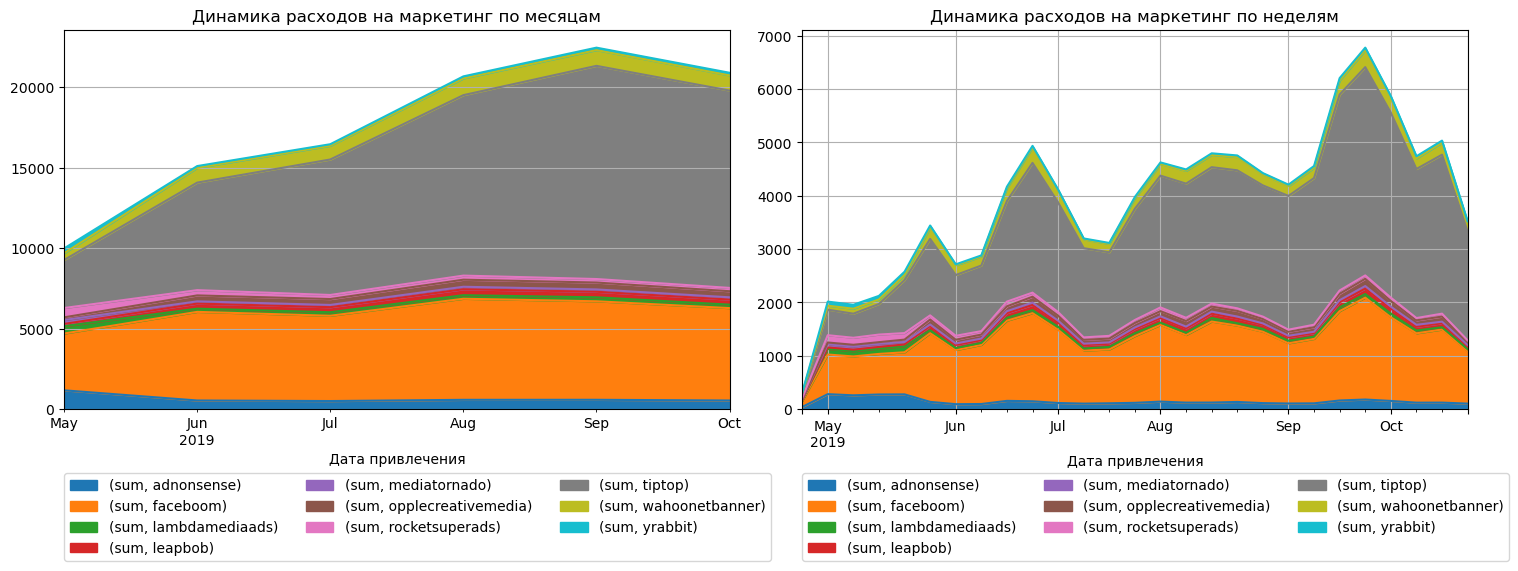

In [42]:
# Создаем столбцы с месяцем и неделями для разбиения
costs['month'] = costs['dt'].values.astype('datetime64[M]') 
costs['week'] = costs['dt'].values.astype('datetime64[W]')
# распределение по месяцам и неделям
costs_week = pd.pivot_table(costs, index = 'week', columns = 'channel', values = 'costs', aggfunc={'sum'} )
costs_month = pd.pivot_table(costs, index = 'month', columns = 'channel', values = 'costs', aggfunc={'sum'} )

# ячейка для графика по месяцам
ax1 = plt.subplot(2, 2, 1)
costs_month.plot.area(grid=True, figsize=(15, 10), ax = ax1)
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов на маркетинг по месяцам')
plt.tight_layout()
plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)


# ячейка для графика по неедлям
ax2 = plt.subplot(2, 2, 2)
costs_week.plot.area(grid=True, figsize=(15, 10), ax = ax2)

plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
plt.xlabel('Дата привлечения') 
plt.title('Динамика расходов на маркетинг по неделям')
plt.tight_layout()
plt.show();

Относительно стабильными остаются затраты на все источники, кроме tiptop, wahoonetbanner, yrabbit. Значительно росли затраты с середины  по конец мая, на вторую неделю июня, с середины июля до начала августа и вторую-третью недели сентября.  с последней недели сентября до конца октября (конец расчетного периода) прослеживается занчительный спад затрат.    
Вычислим стоимость привлечения одного клиента по каждому из источников.

In [43]:
# Стоимость привлечения одного клиента по источникам
acquis_cost = profil.pivot_table(index = 'channel', values = 'acquisition_cost', aggfunc = {'mean'}).sort_values(by = 'mean', ascending = False)
print('Стоимость привлечения одного клиента по источникам')
acquis_cost

Стоимость привлечения одного клиента по источникам


mean
channel                 
tiptop              2.80
faceboom            1.11
adnonsense          1.01
lambdamediaads      0.72
wahoonetbanner      0.60
rocketsuperads      0.41
opplecreativemedia  0.25
yrabbit             0.22
mediatornado        0.22
leapbob             0.21
organic             0.00

Самым дорогим с большим отывом  от остальных источников стало привлечение покупателя в tiptop. Далее пятерку составляют:
faceboom, adnonsense, lambdamediaads, wahoonetbanner, rocketsuperads. Дешевле всего обходится привлечение в leapbob, mediatornado, yrabbit, opplecreativemedia.

Промежуточный вывод:     
Больше всего денежных средств вкладывается в рекламу в tiptop, faceboom, wahoonetbanner. При этом в пересчете на привлеченных клиентов лидирует tiptop со значительным отрывом от faceboom, который является вторым в рейтинге цены за покупателя. За исследуемый период затраты на faceboom остаются относительно одинаковыми, а расходы на 
    tiptop и wahoonetbanner динамично растут.    
Меньше всего траится на mediatornado и yrabbit. В ходе исследования замечено, что на mediatornadoрасходы остаются достаточно стабильными, а на yrabbit виден скачкообразный прирост. В целом, стоимость привлечения клиента в yrabbit, mediatornado и leapbob самая низкая.

##  Оценка окупаемости рекламы

In [44]:
profil.head()  # первые 5 строк таблицы профилей клиентов

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    faceboom     Mac  United States   
1   4919697 2019-07-09 12:46:07    faceboom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  adnonsense      PC        Germany   
4  31989216 2019-10-02 00:07:44     yrabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True              1.09  
1  2019-07-09 2019-07-01  False              1.11  
2  2019-10-01 2019-10-01  False              0.00  
3  2019-08-22 2019-08-01  False              0.99  
4  2019-10-02 2019-10-01  False              0.23

In [45]:
observation_date = datetime(2019, 11, 1).date()  # задаем момент анализа
horizon_days = 14  # задаем горизонт анализа 

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV («пожизненная ценность» клиента) и ROI (окупаемость инвестиций), вызвав функции get_ltv() и plot_ltv_roi().

### LTV, CAC, ROI

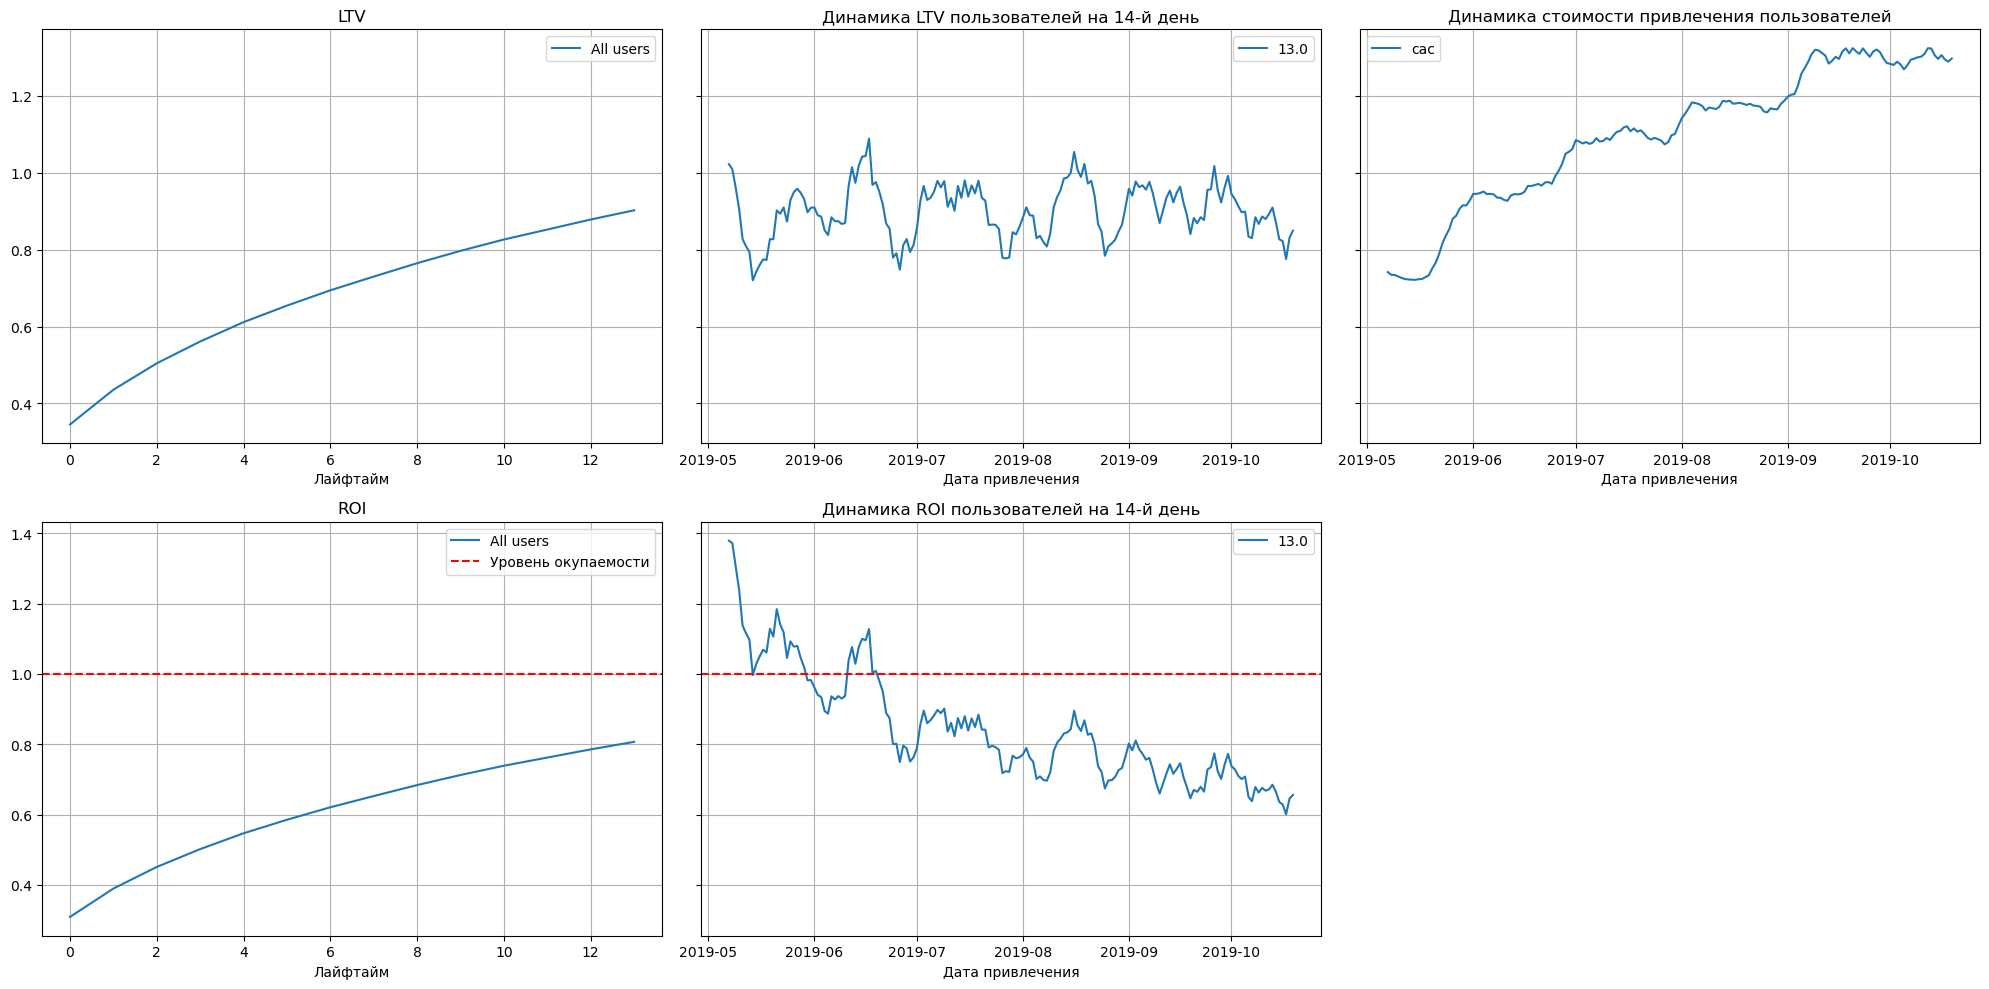

In [47]:
profil = profil.query('channel != "organic"')
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profil, order, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days);

По графикам можно сделать такие выводы:    
Кривая LtV в целом удовлетворительная. Колебания LTV 14го дня в целом равномерные  с тенденцией уменьшения амплитуды к концу рассматриваемых данных. Это говорит о стабилизации. За весь период привлечения пользователей их стоимость резко выросла. Были увеличены расходы на рекламу.    
До конца всего лайфтайма реклама не окупается. ROI к 14 лайфтайму не выходит даже на 0 окупаемость инвестиций. Динамика ROI 14 дня отрицательная.Достигает нулевой окупаемости уже в в середине мая.
Значит, дело, возможно, в неоправданном увеличении рекламного бюджета.
  

### Конверсия

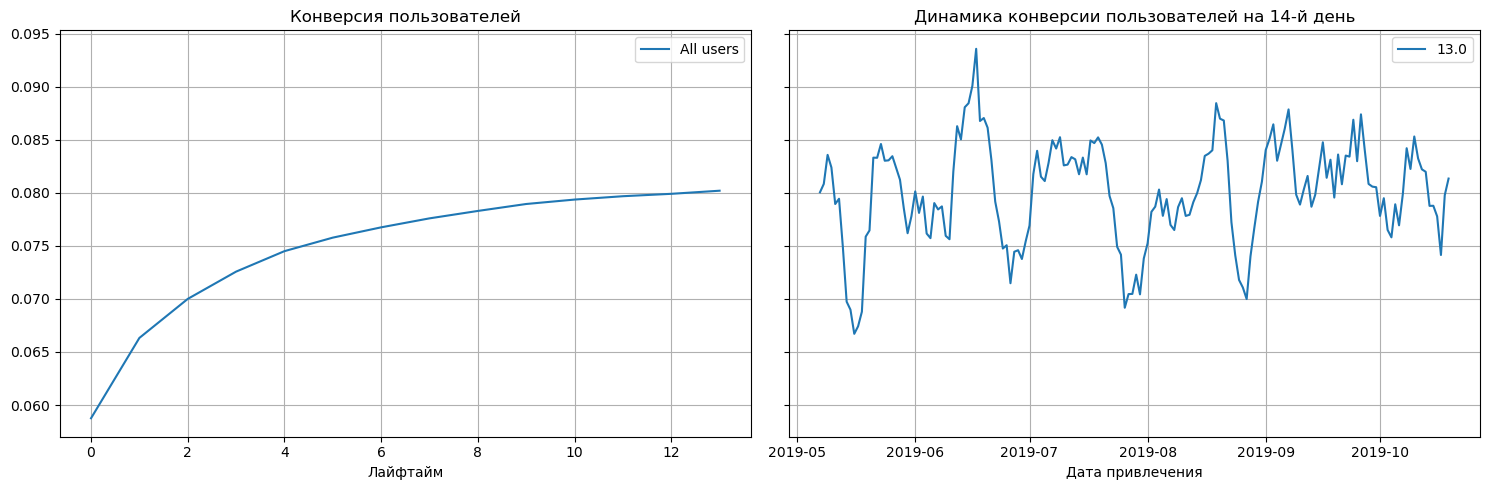

In [48]:
# смотрим конверсию 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profil, order, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей удовлетворительная.После 11-го лайфтайма практически выходит на плато. Конверсия 14-го дня с июня Значительно колеблется, с тенденцией уменьшения амплитуды и небольшим уменьшением с начала сентября.    
Таким образом, конверсия не ухудшается.

### Удержание

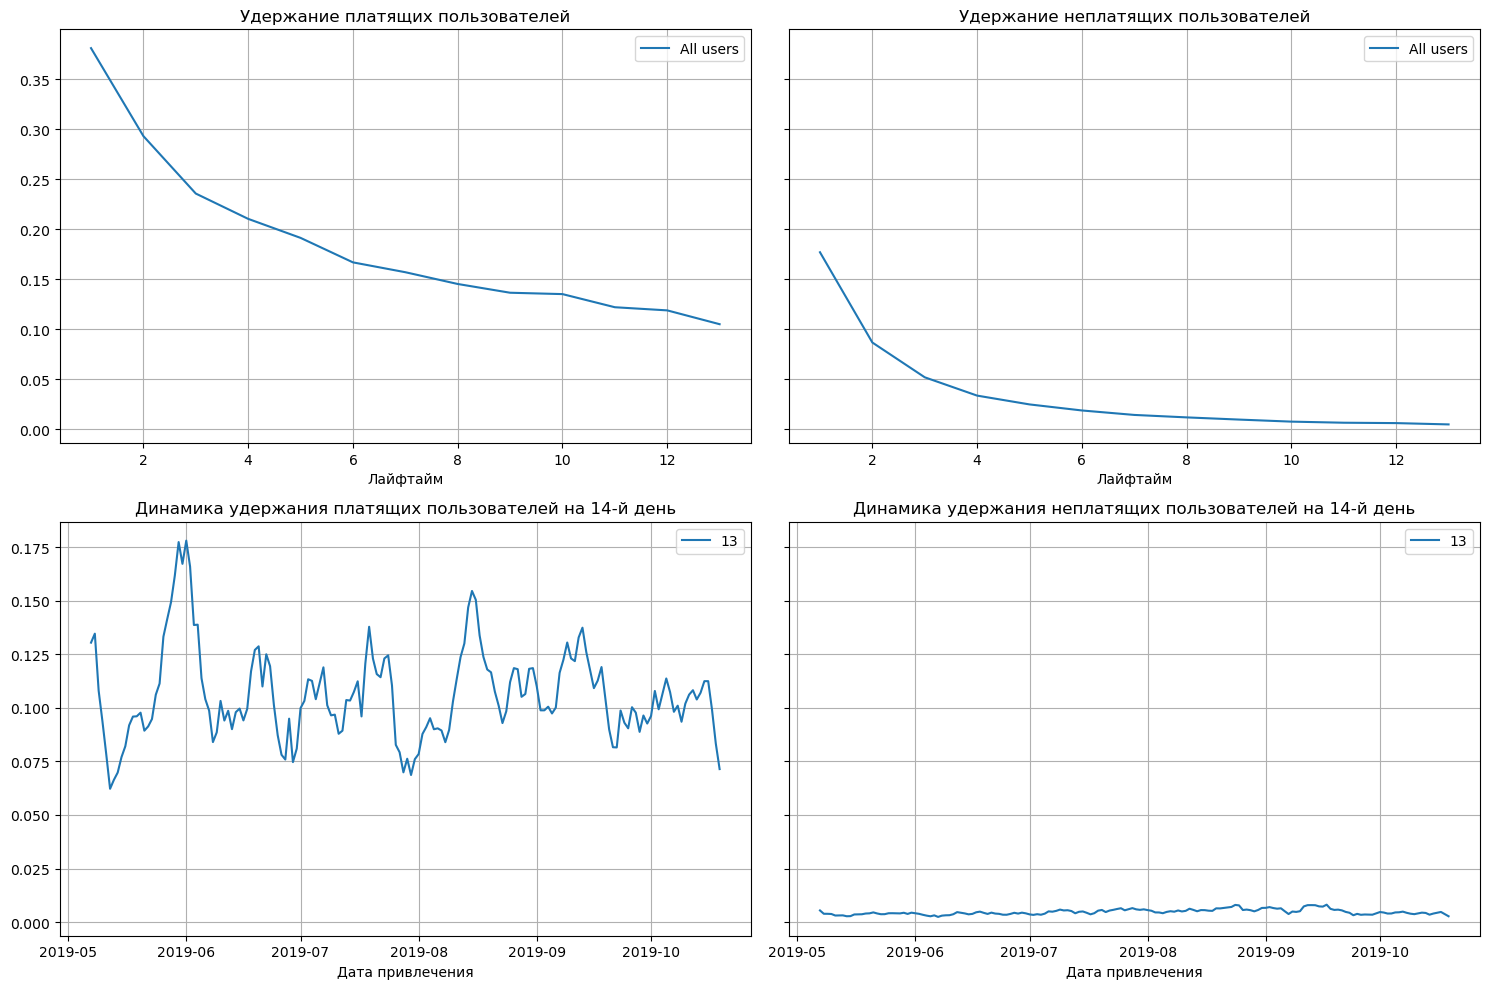

In [49]:
# смотрим удержание 

retention_raw, retention_grouped, retention_history = get_retention(
    profil, user, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание падает. Это нормальная тенденция. Закономерно, что удержание неплатящих хуже, чем платящих.    
Удержание неплатящих пользователей на 14й день сохраняется на одном уровне, это говорит о правильности расчетов. Колебания удержания платящих пользователей на 14 день оносительно стабильно за первого месяца, когда амплитуда была очень большой и последнего, когда амплитуда стала минимальной, но в последние 2 недели произошло падение показателя.
Скорее всего, причина убытков в нерациональных тратах на продвижение. Область, где это наиболее вероятно, определим в процессе дальнейшего анализа.

### Окупаемость с разбивкой по устройствам

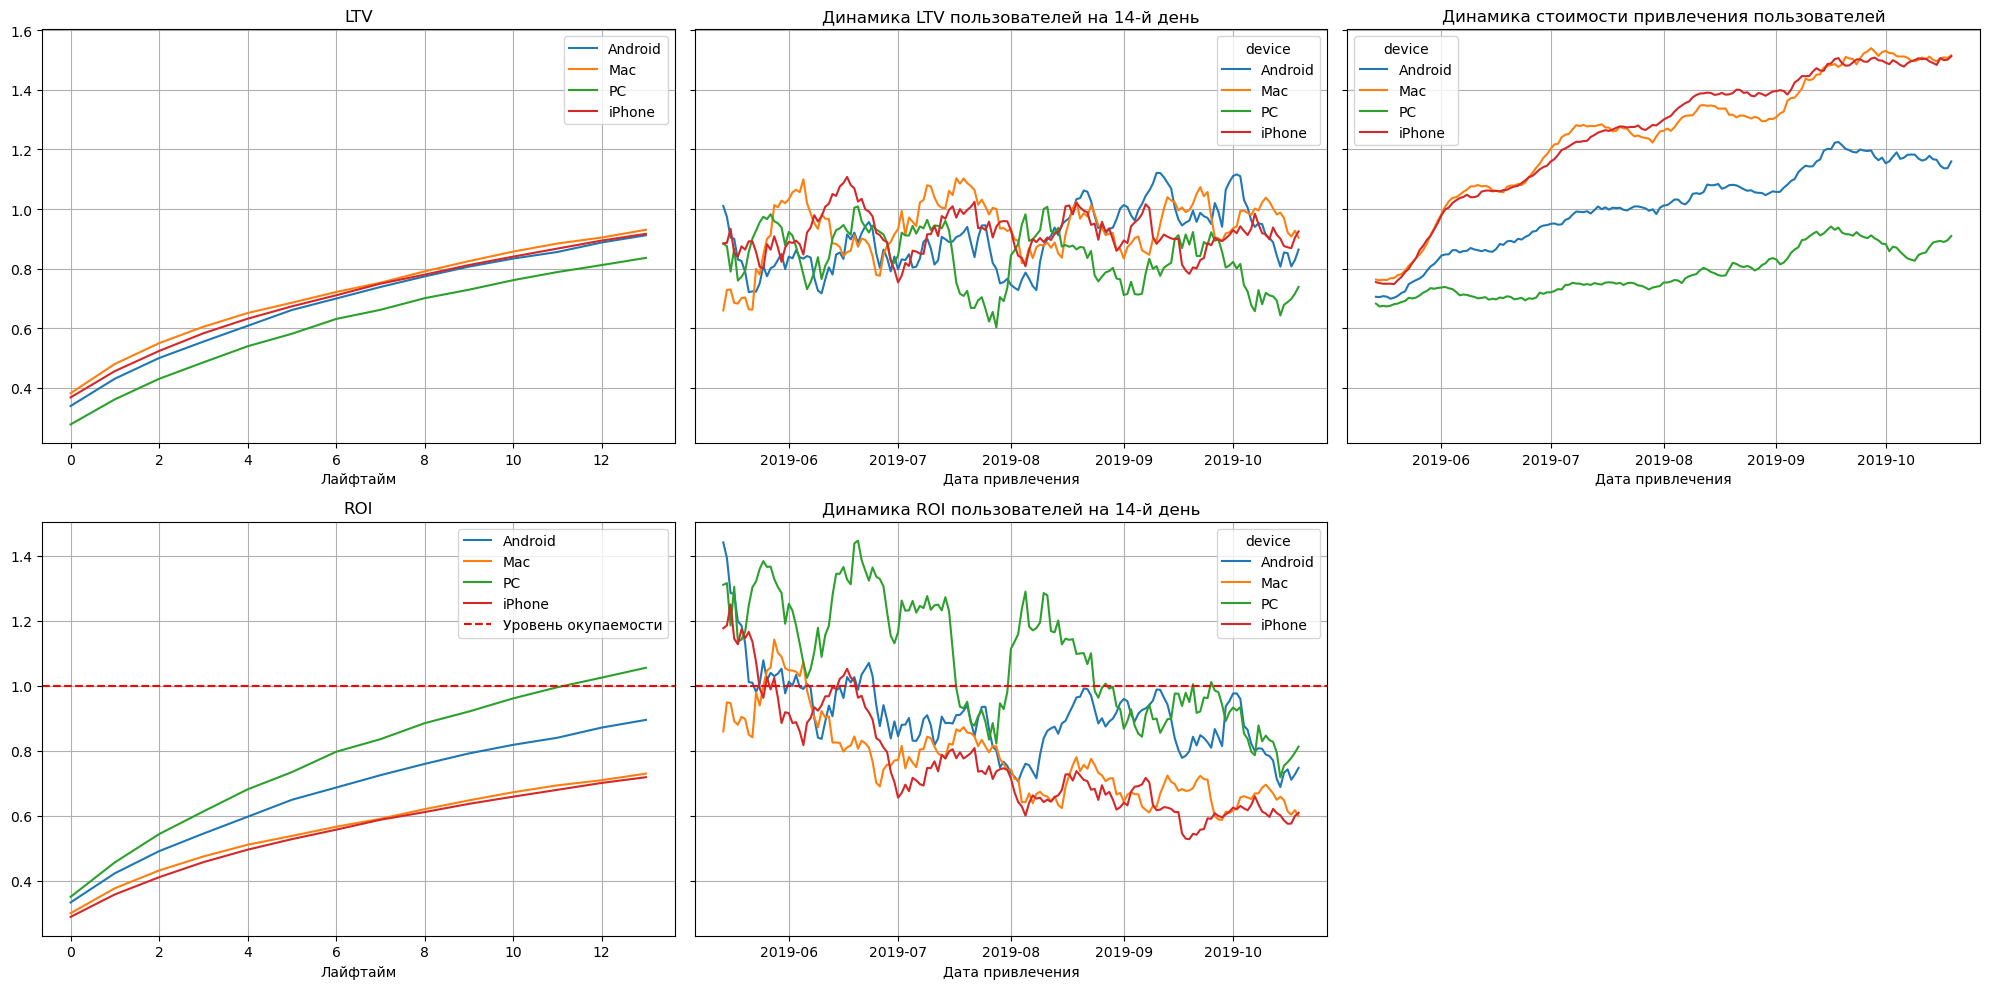

In [50]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profil, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По всем устройстам LTV растет. Динамика на протяжении всего лайфтайма риблизительно одинаковая. Ниже всех - Ltv PC. Из анализа данных мы ранее сделали вывод, что и доля платящих с PC ниже остальных.    
Динамика LTV на 14й день в целом стабильна. Ниже всех устройств расположен Ltv PC.
САС растет на протяжении всего времения исследования. Меньше всего вырасли расходы на PC. Самым дорогими стало привлечение пользователей Mac и iPhone. Android увеличился умеренно.    
Вероятно, это явилось причиной того, что PC окупилось уже на  7 лайфтайм, а Android, Mac и iPhone не окупились совсем.     
Динамика 14го дня отрицательная по всем устройствам. Большую половину периоды были окупаемы инвестиции в PC. Android, Mac и iPhone перестали окупаться на 14 день уже в начале июня.

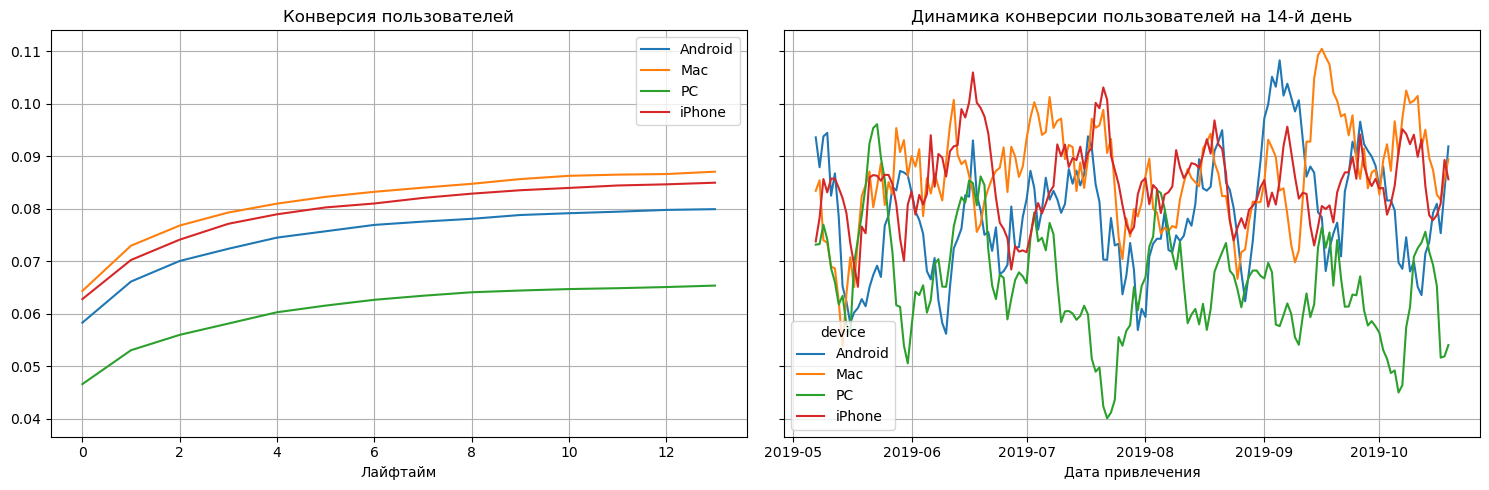

In [51]:
#конверсия с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profil, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия с разбивкой по устройствам показывает, что конверсия Mac и iPhone больше всех. Конверсия клиента на PC почти в 2 раза меньше. По конверсии 14го дня идентичная картина.

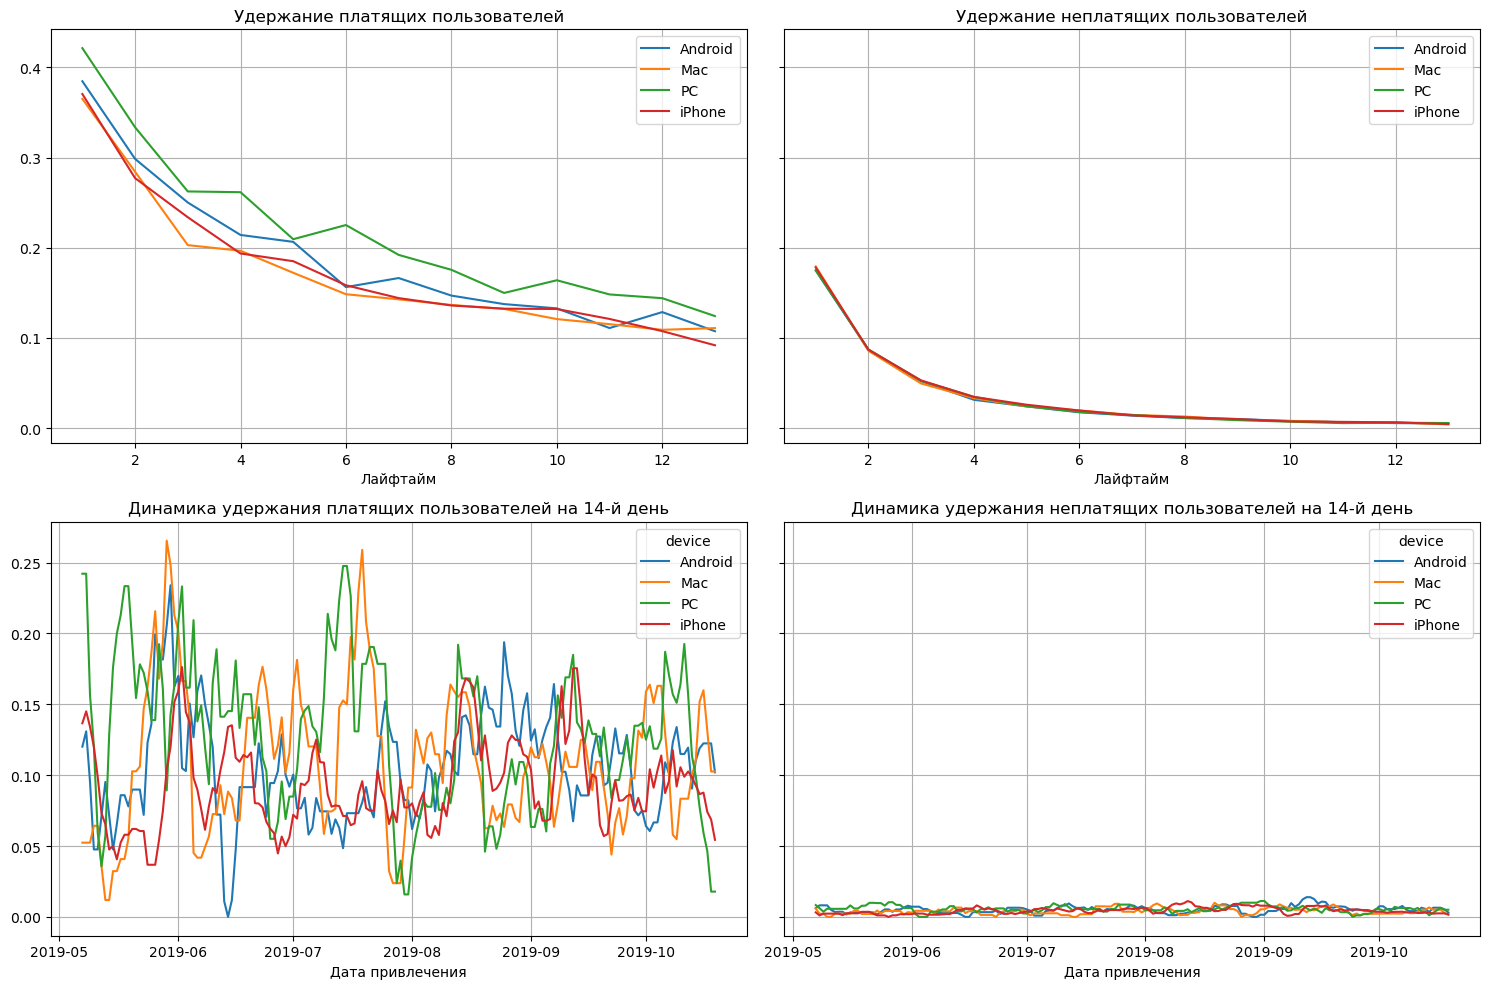

In [52]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profil, user, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

### Окупаемость с разбивкой по странам

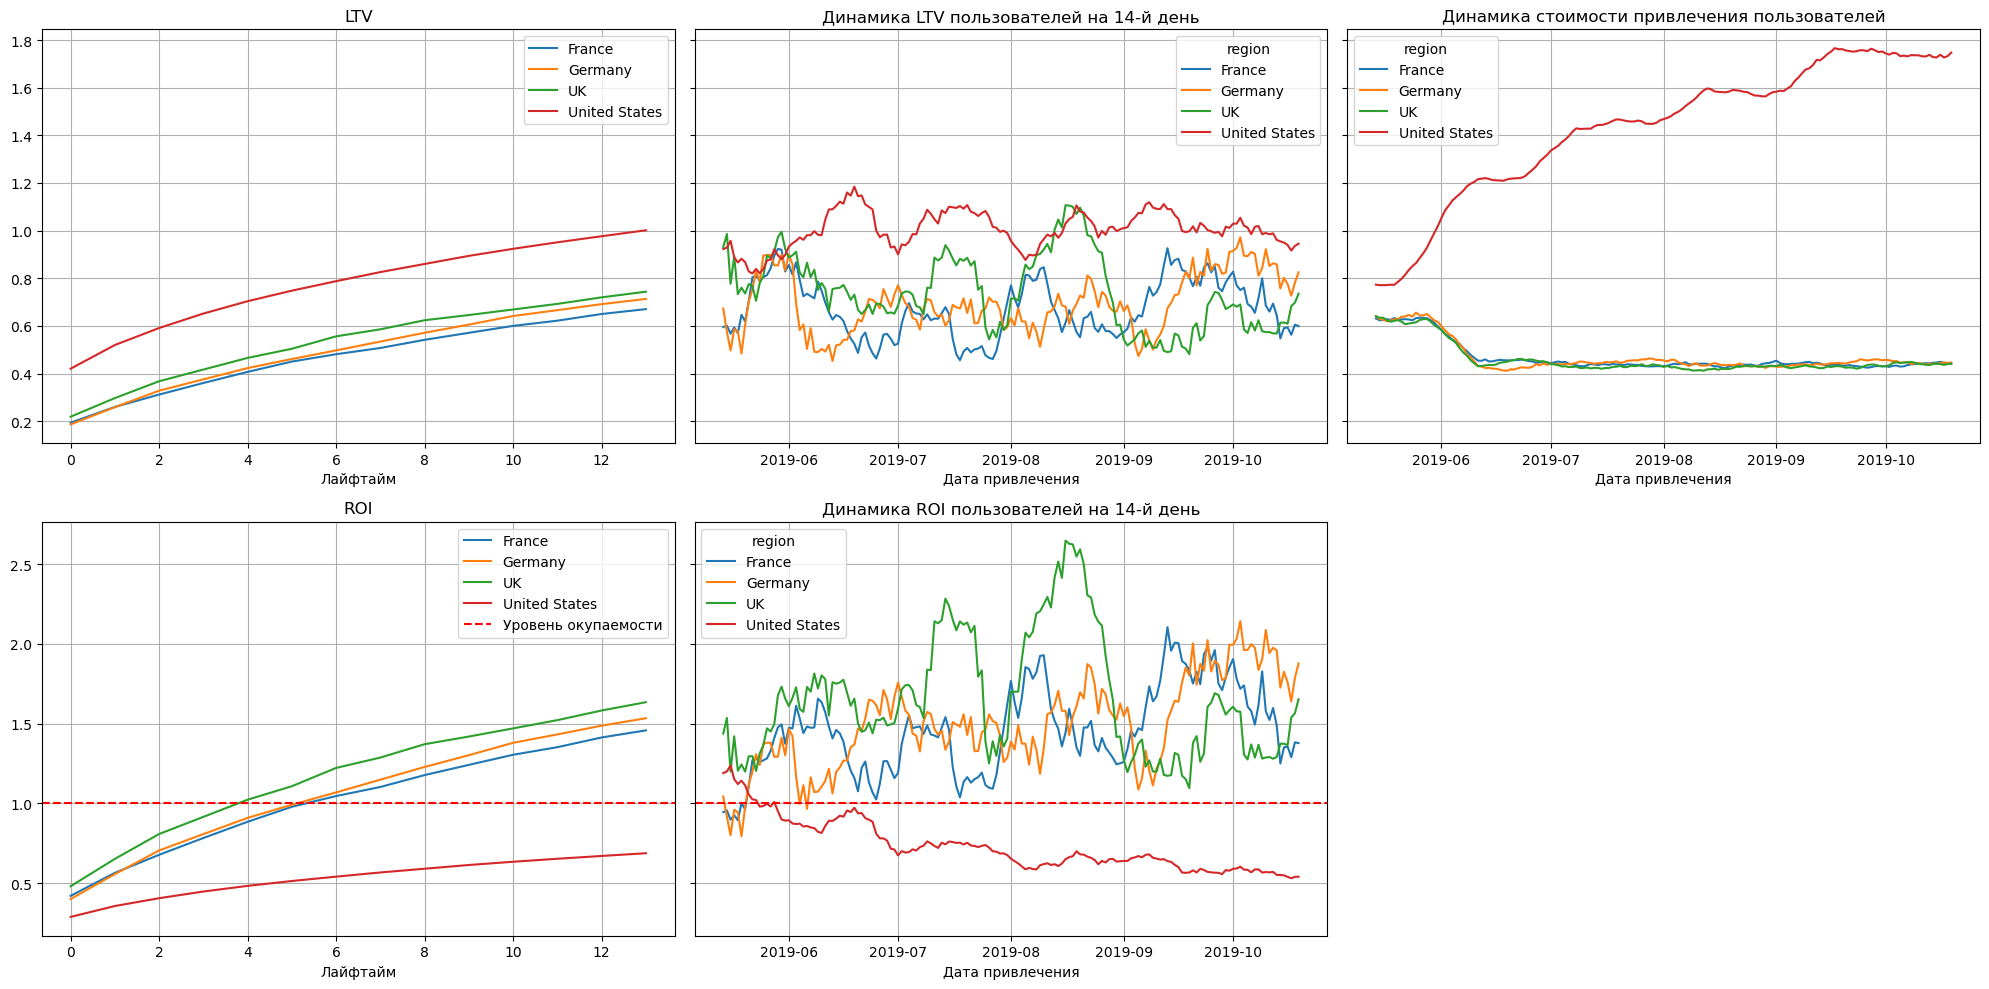

In [53]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profil, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По всем странам LTV растет. Динамика на протяжении всего лайфтайма приблизительно одинаковая. Выше всех - Ltv США. Из анализа данных мы ранее сделали вывод, что и доля платящих в США выше остальных.    
Динамика LTV на 14й день в целом стабильна, за исключением Великобритании. У нее самый большой размах значений.
САС в США динамично растет на протяжении всего времения исследования. Это говорит о том, что на рынок этой страны делались ставки, увеличивались инвестиции. Для остальных стран этот показатель падал с середины мая по середину июня, а затем находится приблизительно на одном уровне.      
Тем не менее, что во всех странах ROI превысило затраты уже на 4-5 лайфтайм, а в США  затраты не окупились совсем. Лучше всего окупается UK.     
Динамика ROI 14го дня отрицательная только для США. В остальных странах, кроме Великобритании, уровень  колебания ROI остается приблизительно стабильным. В UK бросаются в глаза июльские и августовские пики. В это время САС оставался на одном уровне. Такое изменение ROI произошло за счет увеличения LTV в эти периоды.    
Здесь стоит акцентировать внимание на сходство динамики стоимостей привлечения по US и Tip Top.

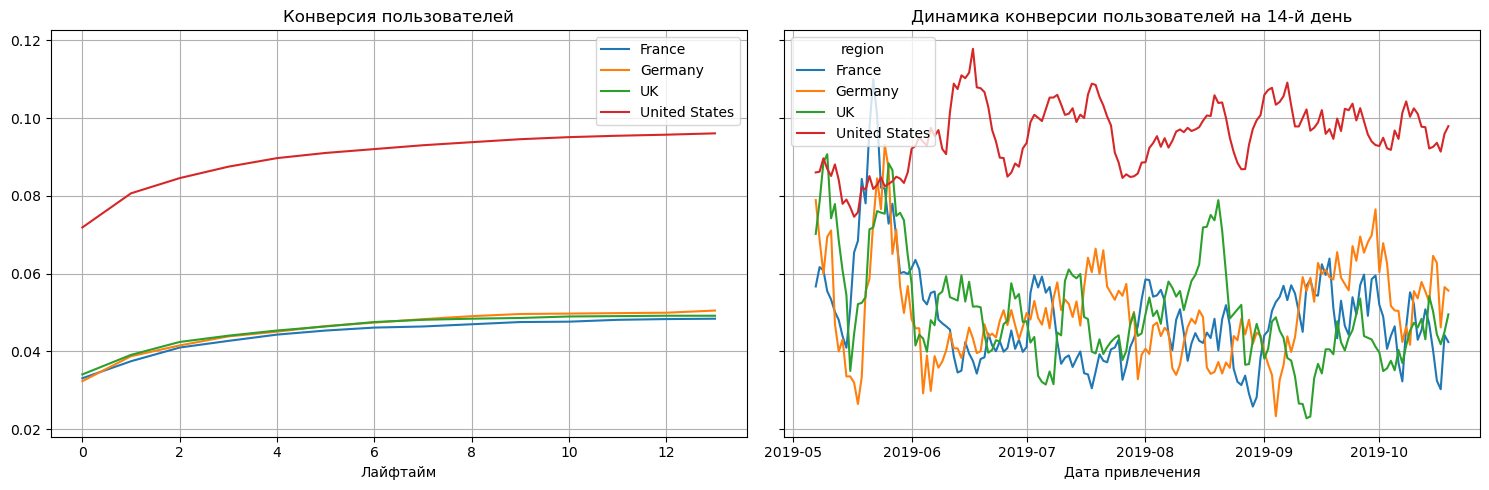

In [54]:
#конверсия с разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profil, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия с разбивкой по странам показывает, что  США значительно опережает остальные страны. По конверсии 14го дня идентичная картина.

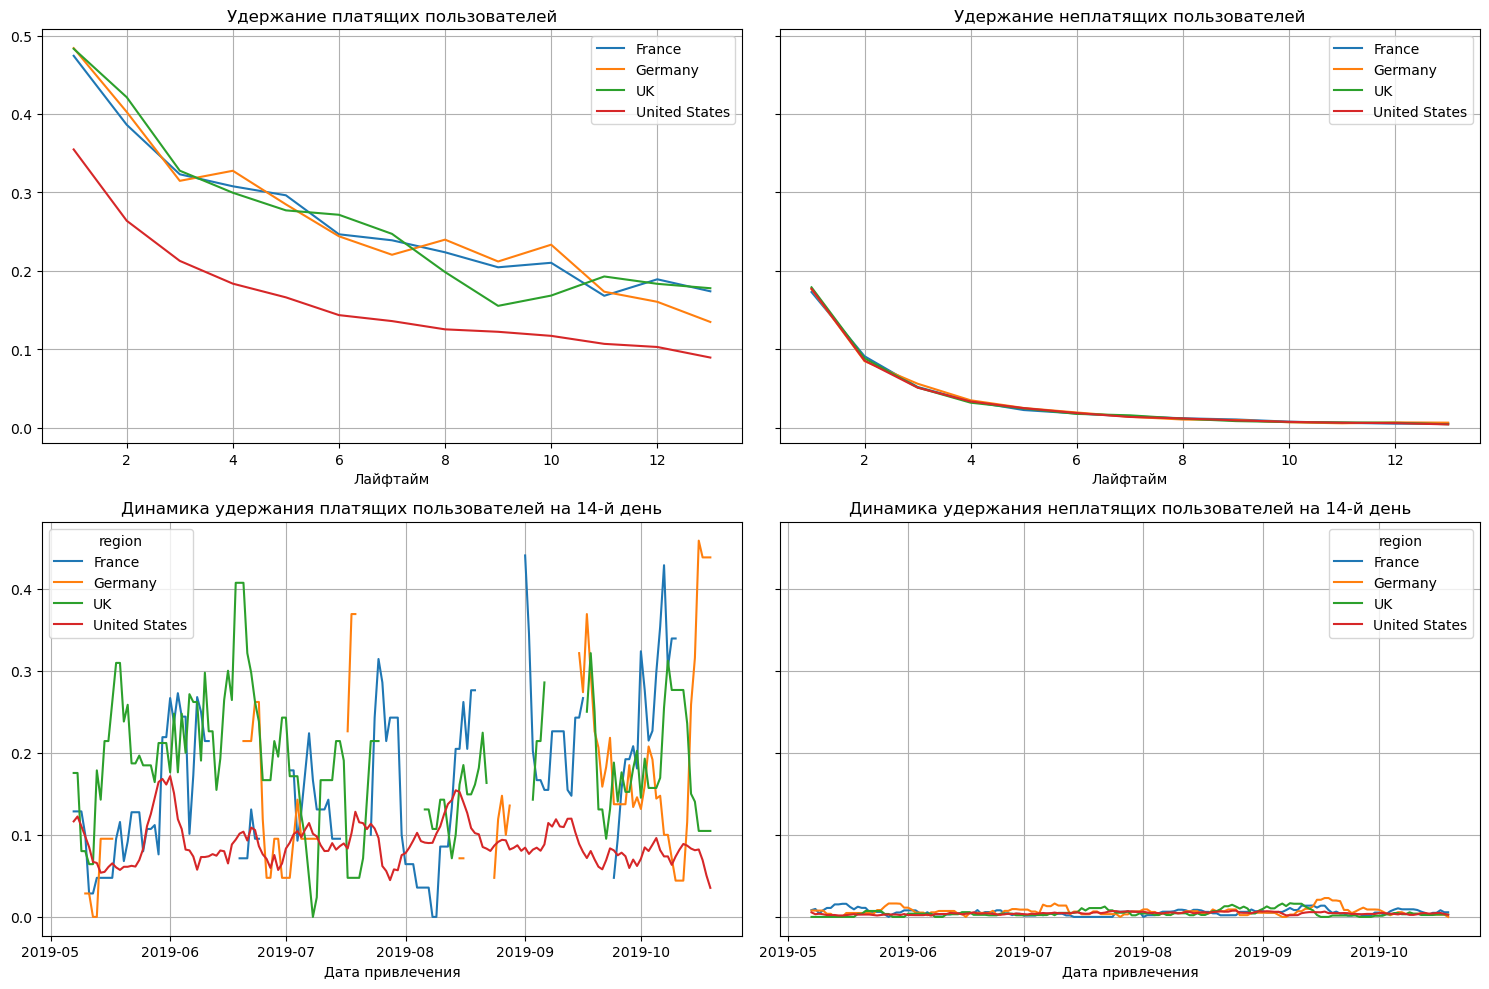

In [55]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profil, user, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По удержанию несколько иная картина.У США удержание хуже всех. Остальные страны удерживаются лучше. Динамика 14го дня показывает, что и на 14 день удержание США было ниже всех, хотя и более стабильно. Прерывистость линий динамики может гооворить о том, что на 14 день данные отстутствовали.    
Существенная проблема - плохое удержание в US, можно было подробнее посмотреть на всех ли каналах, которые приводят трафик в US, такая ситуация.
#Можно предположить, что два самых крупных канала приводят трафик только из US, можно поисследовать. Любопытно, что динамика #конверсии `US` становится с течением времени не такой волатильной.


### Окупаемость с разбивкой по источникам привлечения

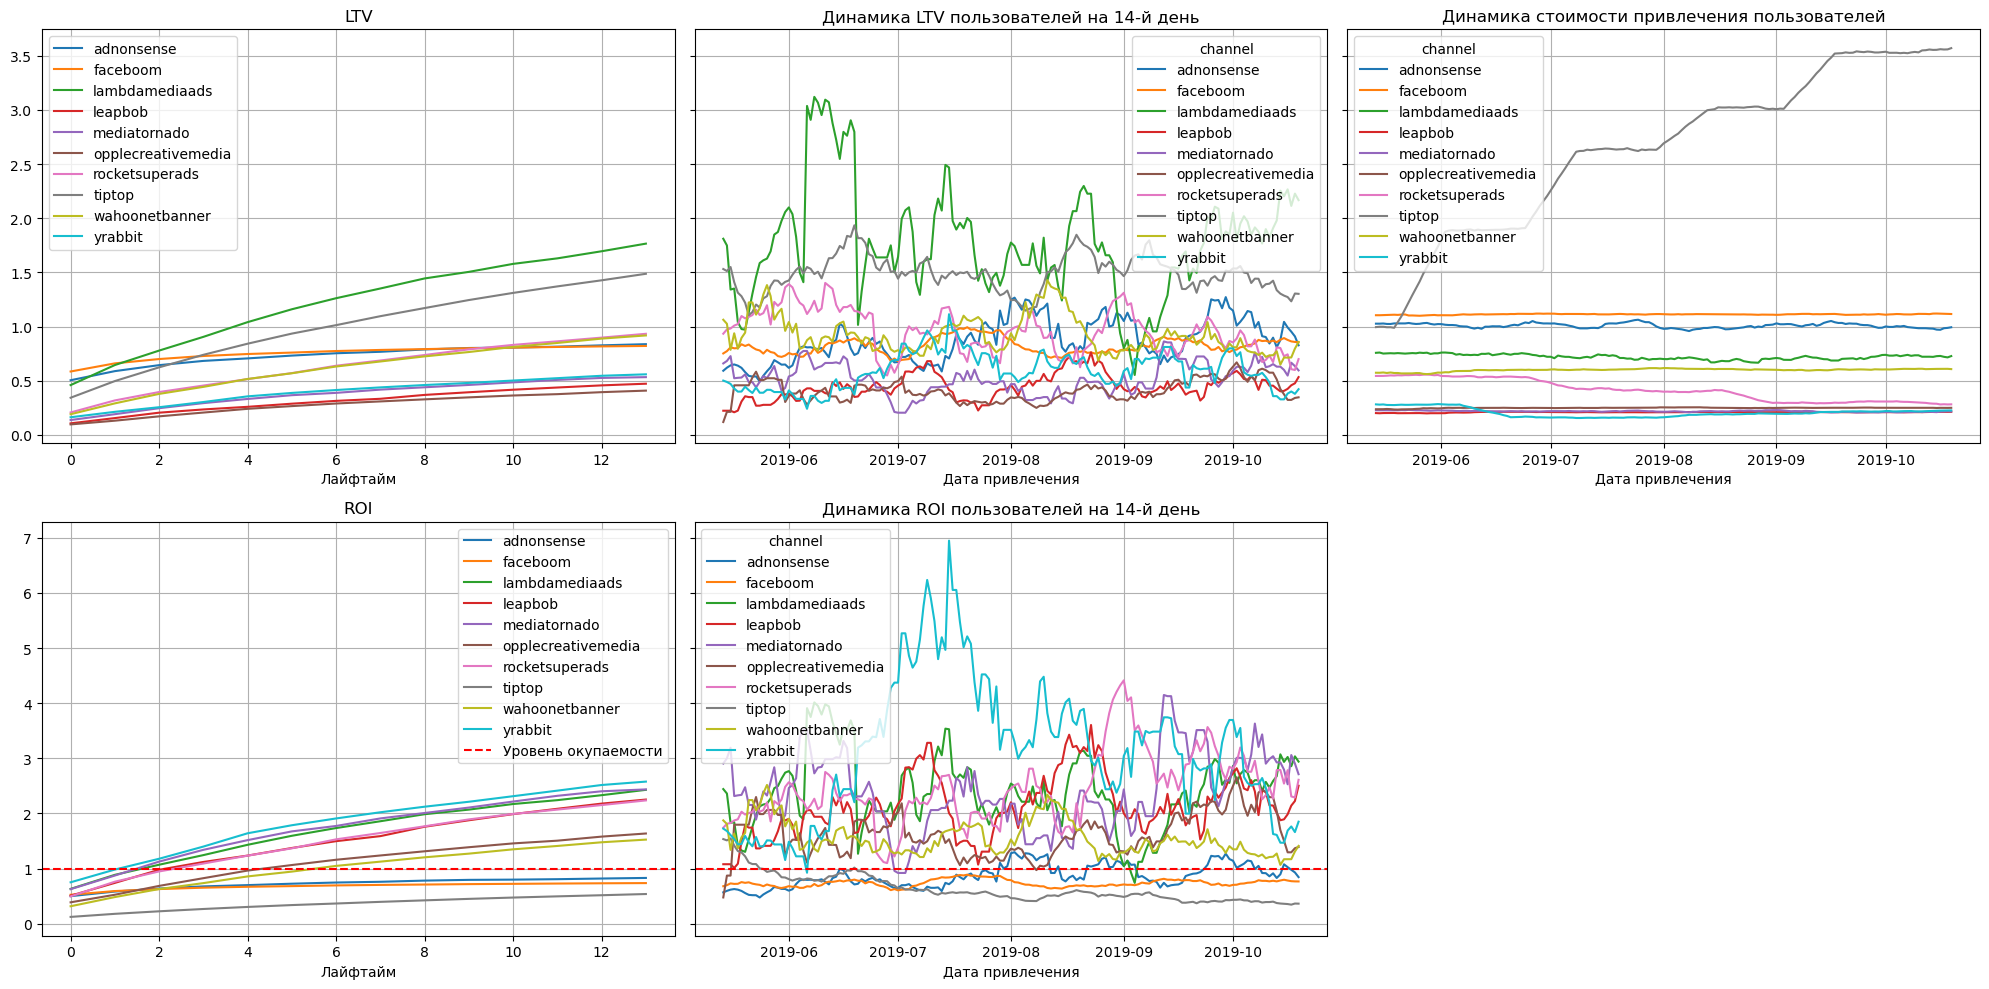

In [56]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profil, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Обнаружилась явная проблема в US и TIp Top с Faceboom, при учете, что US - страна с наибольшим количеством пользователей, а Tip TOp и FaceBoom - крупнешие каналы. Дальше с этим стоит поработать

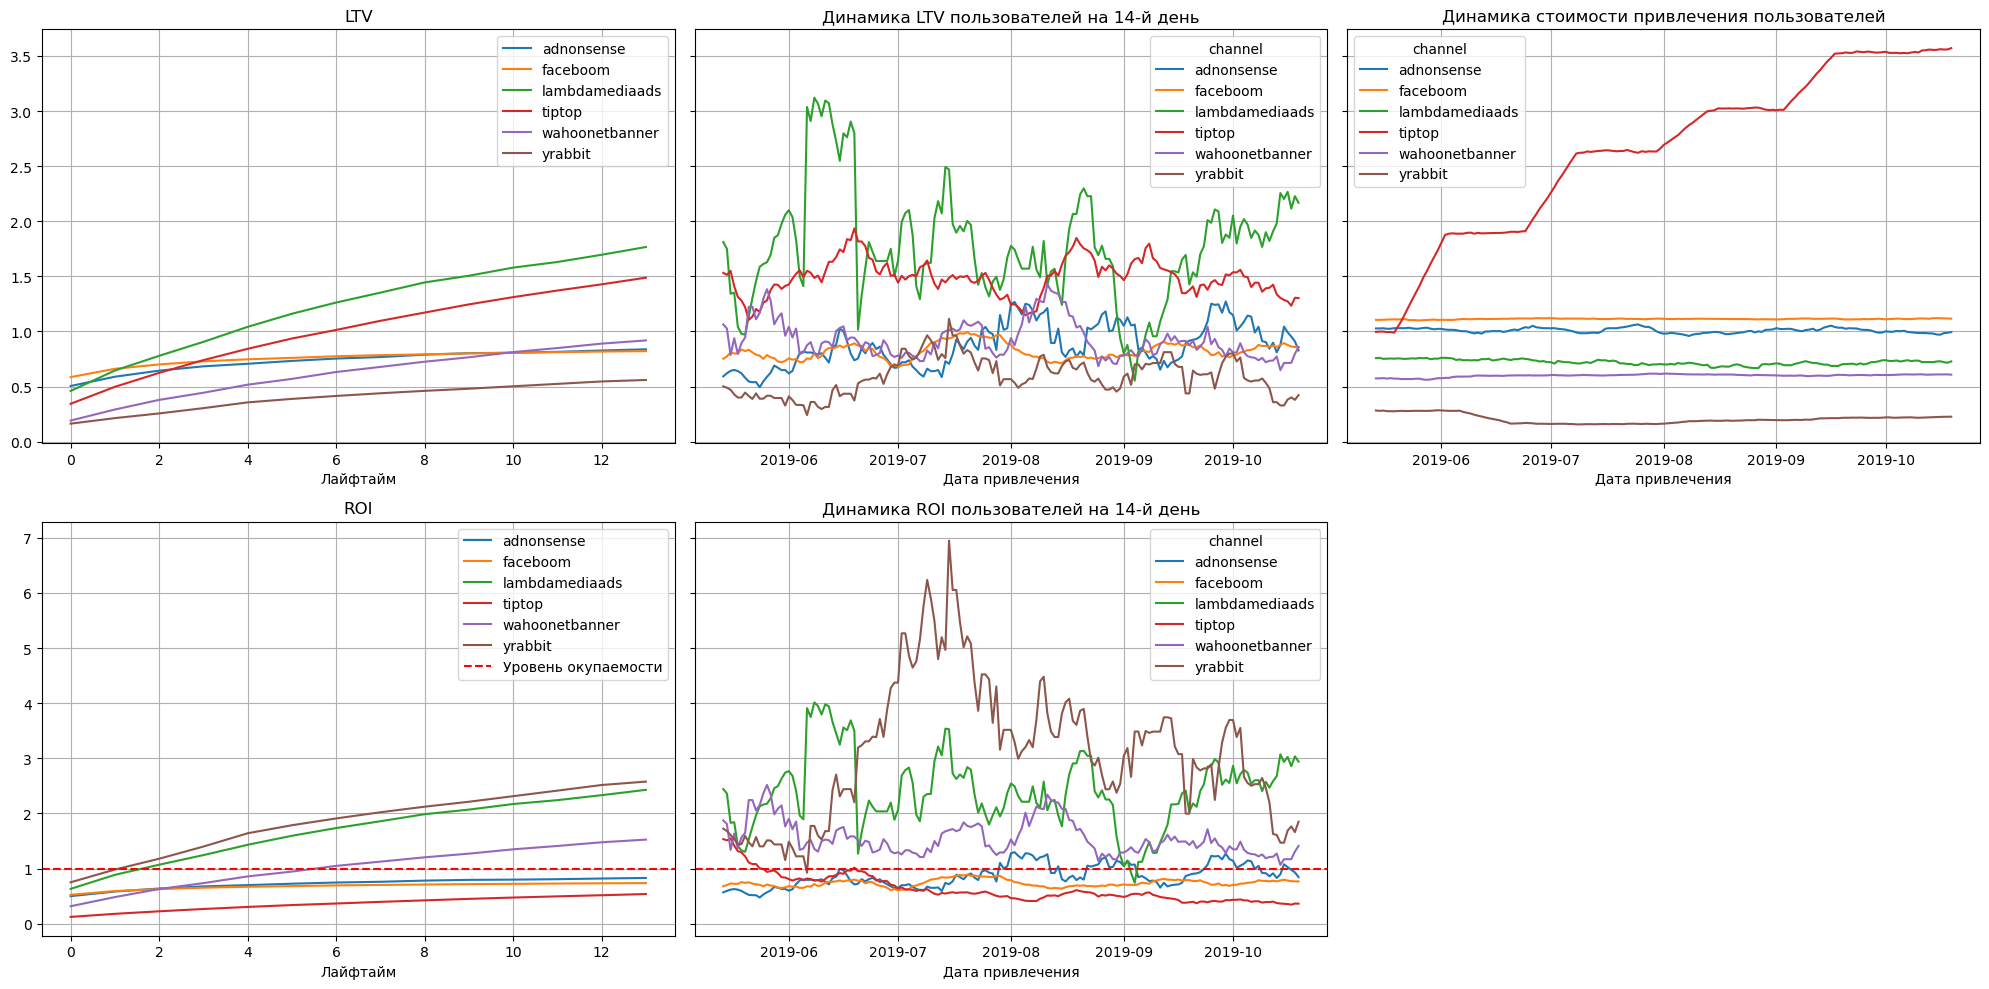

In [57]:
#рассмотрим некоторые каналы привлечения отдельно
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profil.query('channel == ["lambdamediaads", "tiptop", "faceboom", "wahoonetbanner", "adnonsense", "yrabbit"]'), order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

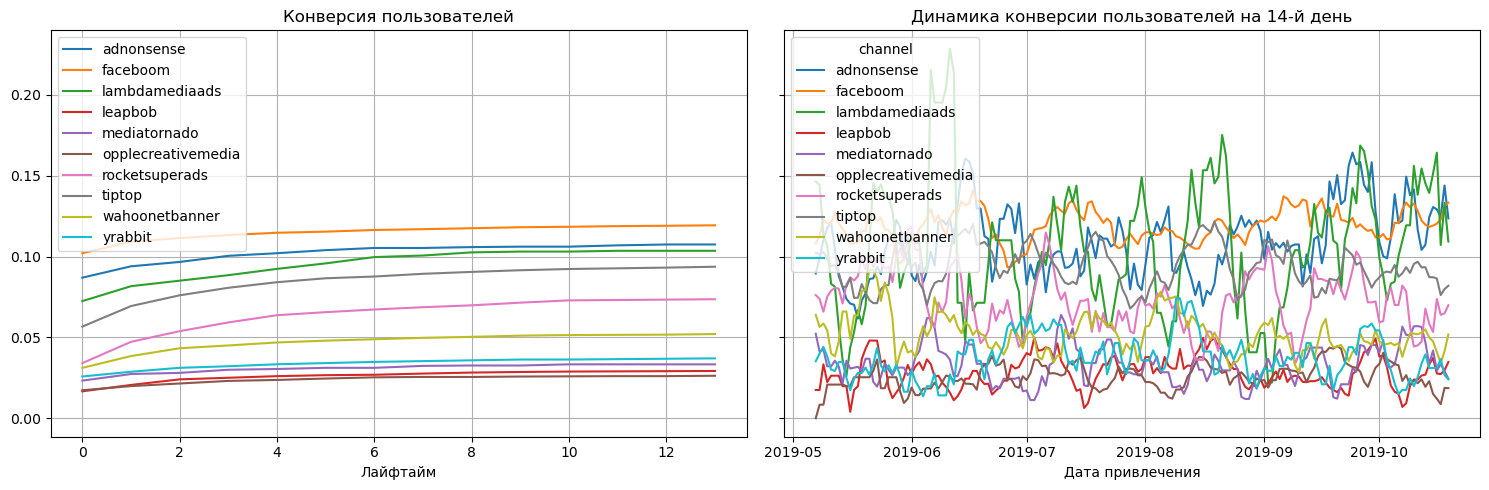

In [58]:
#конверсия с разбивкой по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profil, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия с разбивкой по каналам показывает, что  faceboom  опережает остальные каналы. Далее с небольшим отрывом идут adnonsense, lambdamediaads. Конверсия типтоп самая низкая. По конверсии 14го дня lambdamediaads опережает всех. В среднем на таком же уровне находится faceboom, но ведет себя более стабильно.Конверсия 14го дня у типтоп одна из самых низких. 


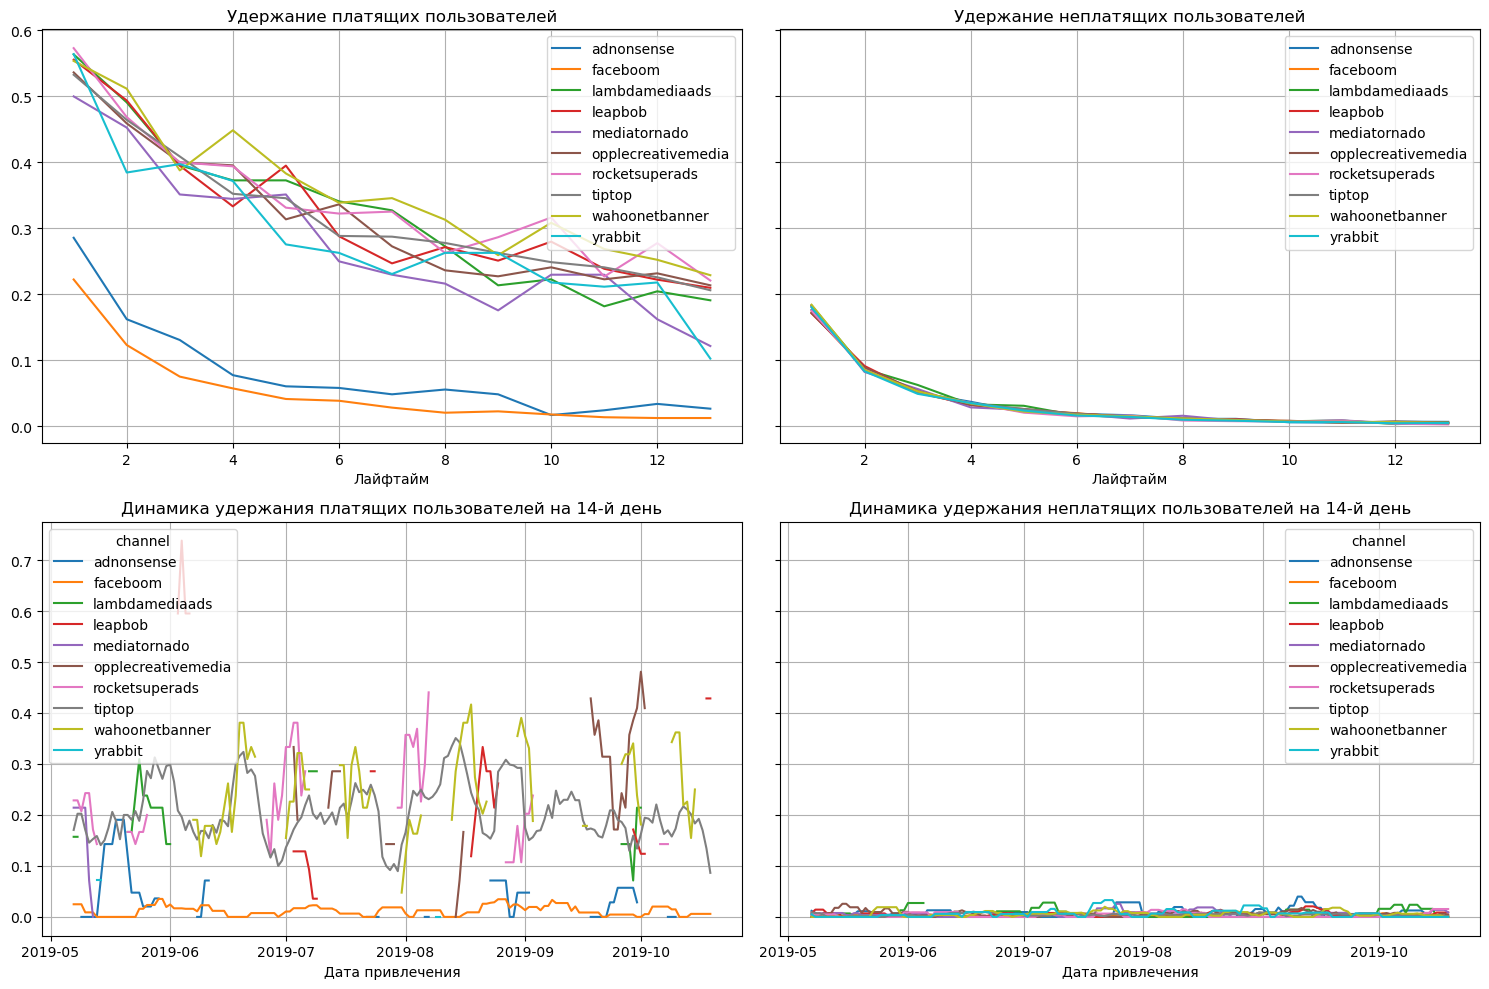

In [59]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profil, user, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По удержанию несколько иная картина.У типтоп удержание платящих хорошее, среди основной массы каналов. faceboom и adnonsense удерживаются хуже всех. Динамика 14го дня faceboom показывает стабильный практически нулевой уровень. По adnonsense данные почти отсутствуют. Можно предположить, что удержание по этому каналу практически всегда отсутствовало. 

Почти всем источникам LTV остается практически на одном уровне на протяжении всего лайфтайма. Это говорит о том, что основное количество покупок было сделано в первые дни и затем практически не увеичивалось. Выраженная динамика есть только у lambadamediaads, tiptop и wahoonetbanner.  Самый высокие значения LTV у lambadamediaads, затем tiptop.
Динамика LTV на 14й день в целом стабильна, за исключением lambadamediaads. Амплитуда колебаний очень большая.Продажи увеличиваются приблизительно в середине каждого месяца, затем снова значительно падают. Лидеры по LTV 14го дня -  tiptop и lambadamediaads. 
Стоимость привлечения пользователей созраняется на одном уровнепо всем каналам, за исключением сильного роста tiptop  и небольшого падения rocketsuperads и yrabbit.     
В большинстве источников ROI превысило затраты до 5 лайфтайма включительно. Не окупились инвестиции для adnonsense,faceboom, tiptop. Лучше всего окупается yrabbit и lambadamediaads.     
ROI 14го дня почти для всех каналов стабилен. Наиболее ровные, но неокупаемые faceboom, tiptop, adnonsense.  Показатель  у yrabbit динамично рос до середины июля, затем упал, но все равно остался на самом высоком уровне. 

### Промежуточные выводы


Промежуточные выводы:     
В целом, реклама, направленная на привлечение пользователей не окупается. При этом конверсия  и удержание удовлетворительные. Меньше всего дохода приносит PC, тем не  менее он окупаем. Пользователи PC конвертируются хуже всех, но удерживаются лучше. Конверсия  Mac и iPhone ниже, но удерживание выше, чем у остальных.
Инвестиции в Аndroid, Mac и iPhone  не окупаются с начала июня. 

Самый большой доход приносят продажи на территории США, тем не менее это единственная страна, где инвестиции в рекламу не окупаются совсем. Конверсия США самая высокая, а удержание стабильно хуже всех остальных стран.

Не окупились инвестиции для adnonsense,faceboom, tiptop. Лучше всего окупается yrabbit и lambadamediaads. Конверсия faceboom выше всех, затем идет adnonsense. КОнверсия  tiptop самая низкая.  По удержанию обратная картина. Удерживаются кленты типтоп хорошо, adnonsense,faceboom удерживаются плохо.

Рекомендации отделу маркетинга:
Вероятнее всего, следовало бы сменить приоритетные направления в рекламе. Сократить расходы на рекламу в США в Аndroid, Mac и iPhone по каналам adnonsense,faceboom, tiptop.
Возможно, сделать ставку на продвижение в UK посредством lambadamediaads.

## Заключительные выводы и рекомендации

В ходе работы были рассмотрены данные логов сервера с данными о посещениях, выгрузка покупок за этот период, рекламных расходов. Данные были проверены на пропуски, дубликаты. Скорректирован временной формат.    
В ходе анализа данных выявлено, что доля платящих пользователей в целом мала. Большая часть их находится в США. По остальным странам(Германия, Великобритания, Франция) платящие пользователи распределены равномерно.
Платящие пользователи одинаково распределены по устройствам, за исключением пользователей, использующих PC. Их несколько меньше.
По источнику привлечения лидирует faceboom (доля 0.12), с значительным отрывом от наименее эффективных источников.Это opplecreativemedia и leapbob (0.03), mediatornado и yrabbit (0.04). Их доля платящих близка к естественному притоку пользователей (0.02). Пятерка лидеров: faceboom, adnonsense, lambdamediaads, tiptop, rocketsuperads.        

Динамика LtV в целом - удовлетворителная. Колебания LTV 14го дня в целом равномерные с тенденцией уменьшения амплитуды к концу рассматриваемых данных. Это говорит о стабилизации. За весь период привлечения пользователей их стоимость резко выросла. Были увеличены расходы на рекламу.
До конца всего лайфтайма реклама не окупается. ROI к 14 лайфтайму не выходит даже на 0 окупаемость инвестиций. Динамика ROI 14 дня отрицательная.Достигает нулевой окупаемости уже в в середине мая. Значит, дело, возможно, в неоправданном увеличении рекламного бюджета.      

Конверсия пользователей умеренная. После 11-го лайфтайма практически выходит на плато. Конверсия 14-го дня с июня Значительно колеблется, с тенденцией уменьшения амплитуды и небольшим уменьшением с начала сентября.
Таким образом, конверсия не ухудшается.  
Удержание падает. Это нормальная тенденция. Закономерно, что удержание неплатящих хуже, чем платящих.
Удержание неплатящих пользователей на 14й день сохраняется на одном уровне, это говорит о правильности расчетов. Колебания удержания платящих пользователей на 14 день оносительно стабильно за первого месяца, когда амплитуда была очень большой и последнего, когда амплитуда стала минимальной, но в последние 2 недели произошло падение показателя. Скорее всего, причина убытков в нерациональных тратах на продвижение.     

Более детальный анализ показал, что по всем устройстам LTV растет. Динамика на протяжении всего лайфтайма риблизительно одинаковая. Ниже всех - Ltv PC. Из анализа данных мы ранее сделали вывод, что и доля платящих с PC ниже остальных.
Динамика LTV на 14й день в целом стабильна. Ниже всех устройств расположен Ltv PC. САС растет на протяжении всего времения исследования. Меньше всего вырасли расходы на PC. Самым дорогими стало привлечение пользователей Mac и iPhone. Android увеличился умеренно.
Вероятно, это явилось причиной того, что PC окупилось уже на 7 лайфтайм, а Android, Mac и iPhone не окупились совсем.
Динамика 14го дня отрицательная по всем устройствам. Большую половину периоды были окупаемы инвестиции в PC. Android, Mac и iPhone перестали окупаться на 14 день уже в начале июня. 
Конверсия с разбивкой по устройствам показывает, что конверсия Mac и iPhone больше всех. Конверсия клиента на PC почти в 2 раза меньше. По конверсии 14го дня идентичная картина.
По удержанию несколько иная картина.У PC удержание платящих лучше всех. Mac и iPhone удерживаются хуже.
Динамика 14го дня показывает, что изначально, колебания удержания были выше, с тенденцией уменьшения амплитуды к концу исследуемого периода.    


По всем странам LTV растет. Динамика на протяжении всего лайфтайма приблизительно одинаковая. Выше всех - Ltv США. Из анализа данных мы ранее сделали вывод, что и доля платящих в США выше остальных.
Динамика LTV на 14й день в целом стабильна, за исключением Великобритании. У нее самый большой размах значений. САС в США динамично растет на протяжении всего времения исследования. Это говорит о том, что на рынок этой страны делались ставки, увеличивались инвестиции. Для остальных стран этот показатель падал с середины мая по середину июня, а затем находится приблизительно на одном уровне.
Тем не менее, что во всех странах ROI превысило затраты уже на 4-5 лайфтайм, а в США затраты не окупились совсем. Лучше всего окупается UK.
Динамика ROI 14го дня отрицательная только для США. В остальных странах, кроме Великобритании, уровень колебания ROI остается приблизительно стабильным. В UK бросаются в глаза июльские и августовские пики. В это время САС оставался на одном уровне. Такое изменение ROI произошло за счет увеличения LTV в эти периоды.
Конверсия с разбивкой по странам показывает, что  США значительно опережает остальные страны. По конверсии 14го дня идентичная картина.
По удержанию несколько иная картина.У США удержание хуже всех. Остальные страны удерживаются лучше. Динамика 14го дня показывает, что и на 14 день удержание США было ниже всех, хотя и более стабильно. Прерывистость линий динамики может гооворить о том, что на 14 день данные отстутствовали.    
  

Почти всем источникам LTV остается практически на одном уровне на протяжении всего лайфтайма. Это говорит о том, что основное количество покупок было сделано в первые дни и затем практически не увеичивалось. Выраженная динамика есть только у lambadamediaads, tiptop и wahoonetbanner. Самый высокие значения LTV у lambadamediaads, затем tiptop. Динамика LTV на 14й день в целом стабильна, за исключением lambadamediaads. Амплитуда колебаний очень большая.Продажи увеличиваются приблизительно в середине каждого месяца, затем снова значительно падают. Лидеры по LTV 14го дня - tiptop и lambadamediaads. Стоимость привлечения пользователей созраняется на одном уровнепо всем каналам, за исключением сильного роста tiptop и небольшого падения rocketsuperads и yrabbit.
В большинстве источников ROI превысило затраты до 5 лайфтайма включительно. Не окупились инвестиции для adnonsense,faceboom, tiptop. Лучше всего окупается yrabbit и lambadamediaads.
ROI 14го дня почти для всех каналов стабилен. Наиболее ровные, но неокупаемые faceboom, tiptop, adnonsense. Показатель у yrabbit динамично рос до середины июля, затем упал, но все равно остался на самом высоком уровне.
Конверсия с разбивкой по каналам показывает, что  faceboom  опережает остальные каналы. Далее с небольшим отрывом идут adnonsense, lambdamediaads. Конверсия типтоп самая низкая. По конверсии 14го дня lambdamediaads опережает всех. В среднем на таком же уровне находится faceboom, но ведет себя более стабильно.Конверсия 14го дня у типтоп одна из самых низких.
По удержанию несколько иная картина.У типтоп удержание платящих хорошее, среди основной массы каналов. faceboom и adnonsense удерживаются хуже всех. Динамика 14го дня faceboom показывает стабильный практически нулевой уровень. По adnonsense данные почти отсутствуют. Можно предположить, что удержание по этому каналу практически всегда отсутствовало.    
    

В целом, реклама, направленная на привлечение пользователей не окупается. При этом конверсия  и удержание удовлетворительные. Меньше всего дохода приносит PC, тем не  менее он окупаем. Пользователи PC конвертируются хуже всех, но удерживаются лучше. Конверсия  Mac и iPhone ниже, но удерживание выше, чем у остальных.
Инвестиции в Аndroid, Mac и iPhone  не окупаются с начала июня. 

Самый большой доход приносят продажи на территории США, тем не менее это единственная страна, где инвестиции в рекламу не окупаются совсем. Конверсия США самая высокая, а удержание стабильно хуже всех остальных стран.

Не окупились инвестиции для adnonsense,faceboom, tiptop. Лучше всего окупается yrabbit и lambadamediaads. Конверсия faceboom выше всех, затем идет adnonsense. КОнверсия  tiptop самая низкая.  По удержанию обратная картина. Удерживаются кленты типтоп хорошо, adnonsense,faceboom удерживаются плохо.    

Рекомендации отделу маркетинга: Вероятнее всего, следовало бы сменить приоритетные направления в рекламе. Сократить расходы на рекламу в США в Аndroid, Mac и iPhone по каналам adnonsense,faceboom, tiptop. Возможно, сделать ставку на продвижение в UK посредством lambadamediaads.